# **Load Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'D:\Data Science\Capstone Project\Capstone Project 3\bike_sharing\data\raw\data_bike_sharing.csv')

In [3]:
data.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [4]:
data.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


# **Data Cleaning**

## **Data Conversion**

In [6]:
cat_features = ['season','holiday', 'weathersit','hr']

data[cat_features] = data[cat_features].astype('category')
data['dteday'] = pd.to_datetime(data['dteday'])


## **Feature Extraction**

In [7]:
data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month.astype('category')
data['day_of_week'] = data['dteday'].dt.day_of_week.astype('category') # (0 = Monday, 6 = Sunday)

data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x > 4 else 0)

In [8]:
data = data.rename(columns={'weathersit':'weather','hum':'humidity','atemp':'feeling_temperature','hr':'hour','cnt':'count'})
data = data.drop(columns=['dteday','casual','registered'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   humidity             12165 non-null  float64 
 1   weather              12165 non-null  category
 2   holiday              12165 non-null  category
 3   season               12165 non-null  category
 4   feeling_temperature  12165 non-null  float64 
 5   temp                 12165 non-null  float64 
 6   hour                 12165 non-null  category
 7   count                12165 non-null  int64   
 8   year                 12165 non-null  int32   
 9   month                12165 non-null  category
 10  day_of_week          12165 non-null  category
 11  is_weekend           12165 non-null  int32   
dtypes: category(6), float64(3), int32(2), int64(1)
memory usage: 548.4 KB


In [10]:
data.head()

,humidity,weather,holiday,season,feeling_temperature,temp,hour,count,year,month,day_of_week,is_weekend
0,0.62,1,0,4,0.3485,0.36,16,250,2011,12,4,0
1,0.64,1,0,2,0.5152,0.54,4,18,2012,6,6,1
2,0.53,1,0,2,0.6212,0.62,23,107,2011,6,2,0
3,0.87,2,0,2,0.3485,0.36,8,145,2012,3,5,1
4,0.55,1,0,3,0.6970,0.76,18,857,2012,7,1,0


## **Check Anomalies**

In [11]:
data.describe()

,humidity,feeling_temperature,temp,count,year,is_weekend
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.476996,0.498185,189.271023,2011.501932,0.285984
std,0.192102,0.171857,0.192492,181.223903,0.500017,0.451901
min,0.000000,0.000000,0.020000,1.000000,2011.000000,0.000000
25%,0.470000,0.333300,0.340000,40.000000,2011.000000,0.000000
50%,0.620000,0.484800,0.500000,142.000000,2012.000000,0.000000
75%,0.780000,0.621200,0.660000,282.000000,2012.000000,1.000000
max,1.000000,1.000000,1.000000,970.000000,2012.000000,1.000000


humidity's 0 is not realistic. So we can drop the condition.

In [12]:
data = data[data['humidity'] != 0]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   humidity             12151 non-null  float64 
 1   weather              12151 non-null  category
 2   holiday              12151 non-null  category
 3   season               12151 non-null  category
 4   feeling_temperature  12151 non-null  float64 
 5   temp                 12151 non-null  float64 
 6   hour                 12151 non-null  category
 7   count                12151 non-null  int64   
 8   year                 12151 non-null  int32   
 9   month                12151 non-null  category
 10  day_of_week          12151 non-null  category
 11  is_weekend           12151 non-null  int32   
dtypes: category(6), float64(3), int32(2), int64(1)
memory usage: 642.6 KB


In [14]:
print('Total Missing Values:', data.isnull().sum().sum())

Total Missing Values: 0


In [15]:
print('Total Duplicates:', data.duplicated().sum())

Total Duplicates: 1


In [16]:
data = data.drop_duplicates()

# **Data Preprocessing**

In [17]:
data.columns

Index(['humidity', 'weather', 'holiday', 'season', 'feeling_temperature',
       'temp', 'hour', 'count', 'year', 'month', 'day_of_week', 'is_weekend'],
      dtype='object')

## **Data Distribution**

In [18]:
from scipy.stats import normaltest

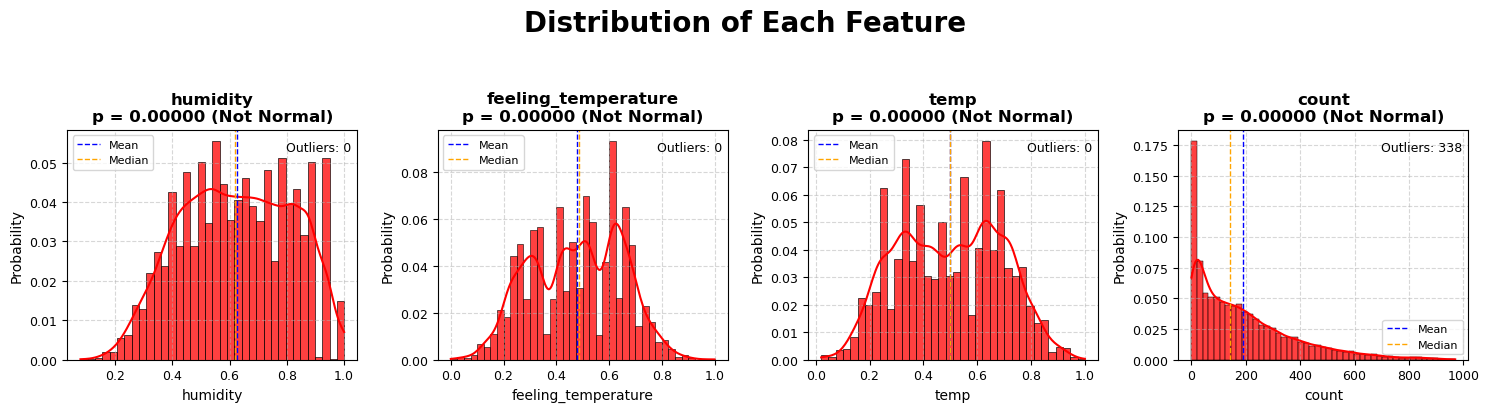

In [26]:
# Select numerical features
num_features = data.select_dtypes(include=['int64', 'float64'])

# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = int(np.ceil(len(num_features.columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
fig.suptitle('Distribution of Each Feature', fontsize=20, weight='bold', y=1.02)

# Loop through columns and plot
for ax, col in zip(axes, num_features.columns):
    # Perform the normality test
    stat, pvalue = normaltest(num_features[col].dropna())
    
    # Determine distribution description
    if pvalue > 0.05:
        distribution = f"p = {pvalue:.5f} (Normal)"
    else:
        distribution = f"p = {pvalue:.5f} (Not Normal)"
    
    color = 'green' if pvalue > 0.05 else 'red'

    # Calculate outliers using IQR
    q1 = num_features[col].quantile(0.25)
    q3 = num_features[col].quantile(0.75)
    iqr = q3 - q1
    outliers = ((num_features[col] < (q1 - 1.5 * iqr)) | (num_features[col] > (q3 + 1.5 * iqr))).sum()

    # Plot histogram with KDE
    sns.histplot(data=num_features[col], ax=ax, kde=True, color=color, stat='probability', alpha=0.75)

    # Add vertical lines for mean and median
    mean = num_features[col].mean()
    median = num_features[col].median()
    ax.axvline(mean, color='blue', linestyle='--', linewidth=1, label='Mean')
    ax.axvline(median, color='orange', linestyle='--', linewidth=1, label='Median')
    ax.legend(fontsize=8)

    # Set title with distribution information
    ax.set_title(f"{col}\n{distribution}", fontsize=12, weight='bold')
    
    # Annotate outliers
    ax.text(0.98, 0.95, f'Outliers: {outliers}', fontsize=9, ha='right', va='top', transform=ax.transAxes)

    # Customize grid and ticks
    ax.grid(visible=True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=9)

# Remove unused axes
for ax in axes[len(num_features.columns):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


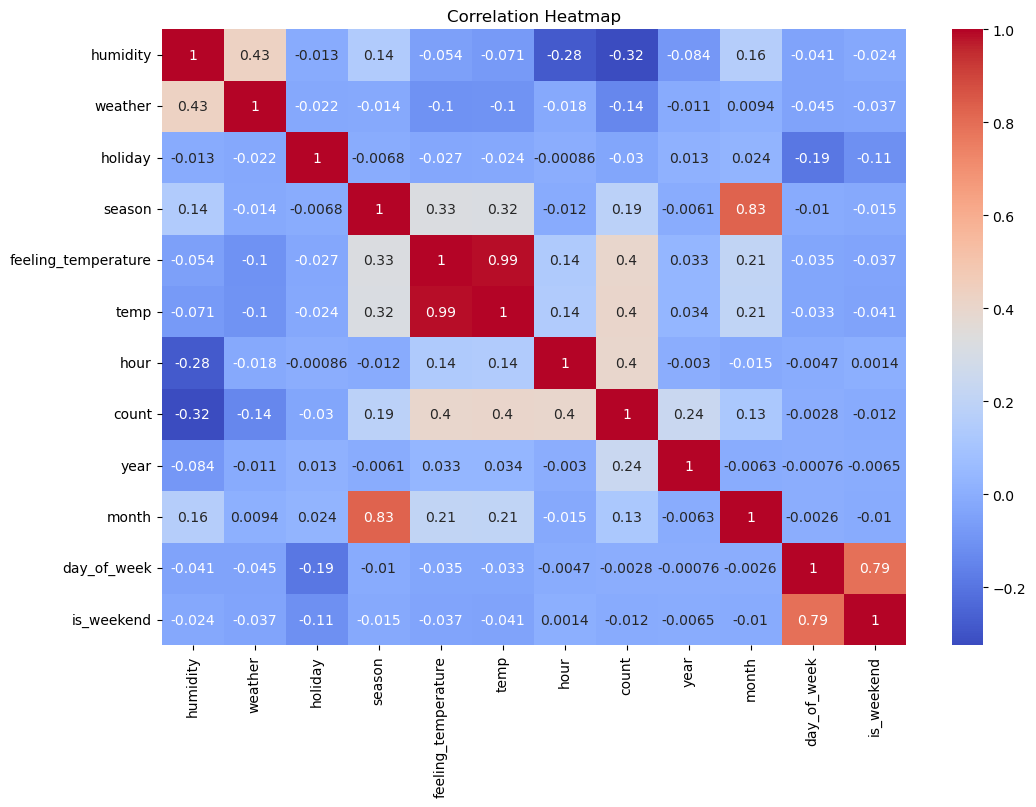

In [20]:
# 1. Korelasi antar fitur
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# 2. Identifikasi fitur yang berkorelasi tinggi dengan target
correlation_with_target = corr['count'].sort_values(ascending=False)
print("Correlation with Target (bikes_rented):\n", correlation_with_target)

Correlation with Target (bikes_rented):
 count                  1.000000
temp                   0.400755
feeling_temperature    0.398409
hour                   0.395459
year                   0.242642
season                 0.185019
month                  0.125209
day_of_week           -0.002761
is_weekend            -0.012494
holiday               -0.030460
weather               -0.140156
humidity              -0.324718
Name: count, dtype: float64


In [22]:
# 3. Menghapus fitur dengan korelasi rendah
threshold = 0.1  # Atur sesuai kebutuhan
selected_features = correlation_with_target[correlation_with_target.abs() > threshold].index.tolist()
selected_features.remove('count')  # Target tidak perlu dimasukkan sebagai fitur

print("Selected Features:", selected_features)

Selected Features: ['temp', 'feeling_temperature', 'hour', 'year', 'season', 'month', 'weather', 'humidity']


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
# Pilih fitur numerik (VIF hanya berlaku untuk variabel numerik)
X = data.select_dtypes(include=['float64', 'int64'])

# Fungsi untuk menghitung VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# Hitung VIF
vif_data = calculate_vif(X)
print(vif_data)

              variable         VIF
0             humidity    5.816785
1  feeling_temperature  336.242581
2                 temp  305.475613
3                count    2.629593


## **Exploration Data Analysis**

### **Seasonal, Weather, and Holiday Distributions**

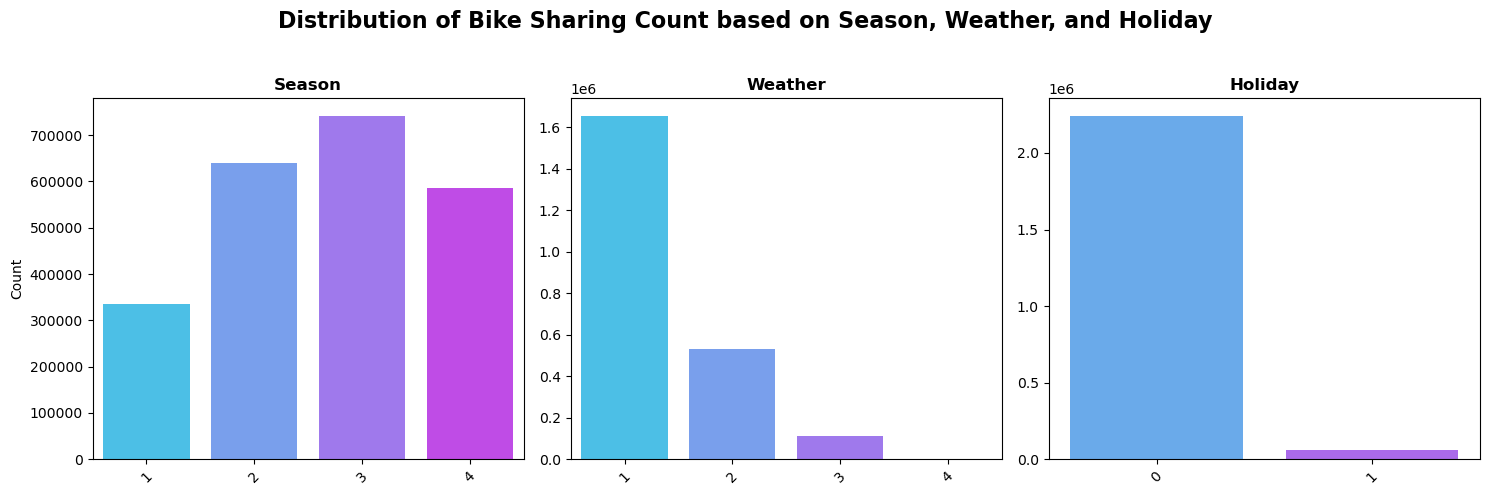

In [25]:
columns = ['season', 'weather', 'holiday']
titles = ['Season', 'Weather', 'Holiday']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Bike Sharing Count based on Season, Weather, and Holiday', fontsize=16, weight='bold')

# Loop through the columns and create the plots
for ax, col, title in zip(axes, columns, titles):
    sns.barplot(x=col, y='count', data=data, ax=ax, estimator='sum', ci=None, palette='cool')
    ax.set_title(title, fontsize=12, weight='bold')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('Count', fontsize=10) if col == 'season' else ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()